<a href="https://colab.research.google.com/github/Takouabelwafa/Test-Technique-Full-Pack-AI-/blob/main/Test_Technique_Task2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet 2 — Analyse de sentiments sur des avis de films

**Objectif :** Classer automatiquement les critiques de films (positif/négatif)
**Techniques :** LSTM, GRU, Word Embedding, Attention
•📦** Dataset :**
IMDB Movie Review Dataset
**•🔧 Tâches :**
•Tokenisation, padding
•Embedding layer
•Modèle LSTM ou GRU
•Visualisation des résultats
•Comparaison avec baseline

In [34]:
#importation des bibliothéques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
#charger le drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [37]:
 #load data

 data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [39]:
data.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [40]:
data.isnull().sum()

,0
review,0
sentiment,0


In [41]:
data['review'] = data['review'].fillna("")


# 1)- Tokenisation, padding

* La ***tokenisation*** est le processus de transformation d'un texte en unités appelées **tokens** (mots, sous-mots, caractères ou symboles).  
Chaque token est ensuite converti en un **entier unique** à l'aide d'un dictionnaire (ou vocabulaire), afin que le texte puisse être traité par un modèle d'apprentissage automatique.

* Le **padding** consiste à ajouter des zéros (ou une valeur spéciale) à la fin (padding='post') ou au début (padding='pre') des séquences pour qu'elles aient toutes la même longueur.








In [42]:


# Nombre de mots à garder   c.a.d les mot les plus fréquents
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
# Mettre les token en meme longeur
maxlen = 50 # la longeur de mot ne dépasse pas 50
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


# 2)- Embedding layer

* Une couche d'embedding transforme les nombres qui représentent les mots (après la tokenisation) en vecteurs de nombres réels.
En d'autres termes, elle apprend à traduire chaque mot en une forme numérique compacte qui capture son sens et ses relations avec les autres mots.
Ainsi, le modèle peut mieux comprendre la signification des mots et leurs liens dans une phrase.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),#un réseau LSTM (Long Short-Term Memory)
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* But : Lire la séquence dans le temps (mot par mot) et retenir les dépendances contextuelles (mémoire longue et courte).

* 128 → nombre de neurones dans la couche LSTM.

* dropout=0.2 → désactive 20 % des connexions en entrée pour éviter le surapprentissage.

* recurrent_dropout=0.2 → désactive 20 % des connexions récurrentes (liées au temps).

* Rôle du LSTM :

    * Comprend la relation entre les mots dans une phrase.

    * Cetient les informations importantes et oublie les inutiles grâce à ses “portes” (input, forget, output).

    * Meilleur qu'un simple réseau dense ou RNN classique pour les textes longs.


# 3)- Modèle LSTM ou GRU

In [44]:
historique = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - accuracy: 0.6857 - loss: 0.5659 - val_accuracy: 0.7708 - val_loss: 0.4686
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.8547 - loss: 0.3447 - val_accuracy: 0.8058 - val_loss: 0.4337
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 115ms/step - accuracy: 0.8859 - loss: 0.2780 - val_accuracy: 0.7878 - val_loss: 0.4728
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9165 - loss: 0.2120 - val_accuracy: 0.7932 - val_loss: 0.5474
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.9380 - loss: 0.1651 - val_accuracy: 0.7798 - val_loss: 0.5377


In [45]:
# Afficher les clés disponibles
print(historique.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [46]:
# Dernière accuracy sur le jeu d'entraînement et de validation
train_acc = historique.history['accuracy'][-1]
val_acc = historique.history['val_accuracy'][-1]

print(f"Accuracy finale sur train : {train_acc:.4f}")
print(f"Accuracy finale sur validation : {val_acc:.4f}")

Accuracy finale sur train : 0.9324
Accuracy finale sur validation : 0.7798


    #Compariason avec GRU
    #from tensorflow.keras.layers import GRU

    #model_gru = Sequential([
        #Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
        #GRU(128, dropout=0.2, recurrent_dropout=0.2),
        #Dense(1, activation='sigmoid')
    #])



    - Le code entraîne ton modèle LSTM sur les avis IMDb

    - Il apprend sur 80 % des données

    - Vérifie sa performance sur 20 %

    - Pendant 5 tours

    - En ajustant les poids toutes les 64 phrases.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Séparation des données ---
X_train, X_test, y_train, y_test = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42
)

# --- 2. TF-IDF vectorization ---
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# --- 3. Entraînement du modèle ---
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_tfidf, y_train)

# --- 4. Prédiction ---
y_pred = model_lr.predict(X_test_tfidf)

# --- 5. Évaluation ---
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.8951

Rapport de classification :

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000




# 4)- Visualisation des résultats

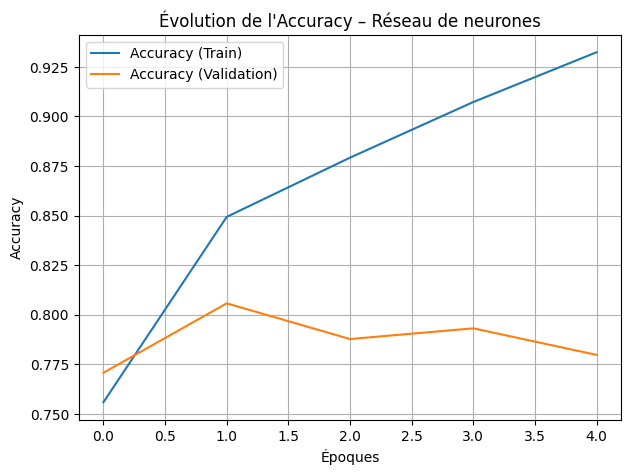

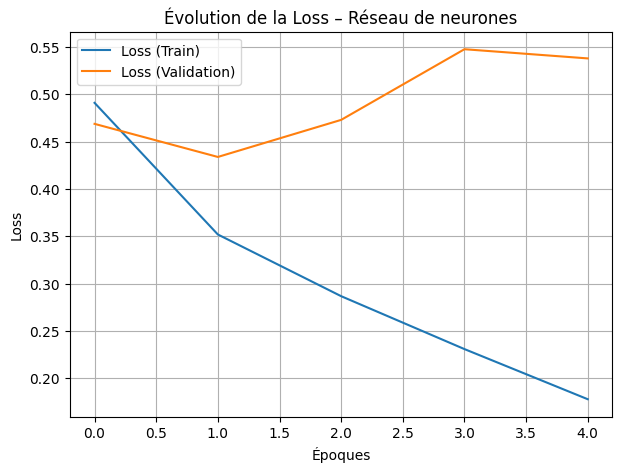

In [51]:

import matplotlib.pyplot as plt

# --- Accuracy ---
plt.figure(figsize=(7,5))
plt.plot(historique.history['accuracy'], label='Accuracy (Train)')
plt.plot(historique.history['val_accuracy'], label='Accuracy (Validation)')
plt.title("Évolution de l'Accuracy – Réseau de neurones")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# --- Loss ---
plt.figure(figsize=(7,5))
plt.plot(historique.history['loss'], label='Loss (Train)')
plt.plot(historique.history['val_loss'], label='Loss (Validation)')
plt.title("Évolution de la Loss – Réseau de neurones")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



# Regression logistique

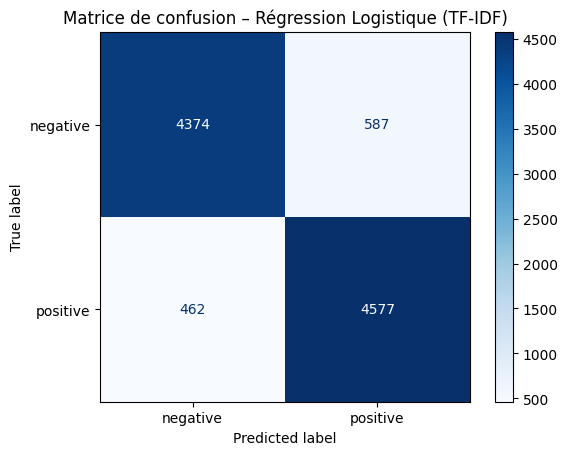

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion – Régression Logistique (TF-IDF)")
plt.show()

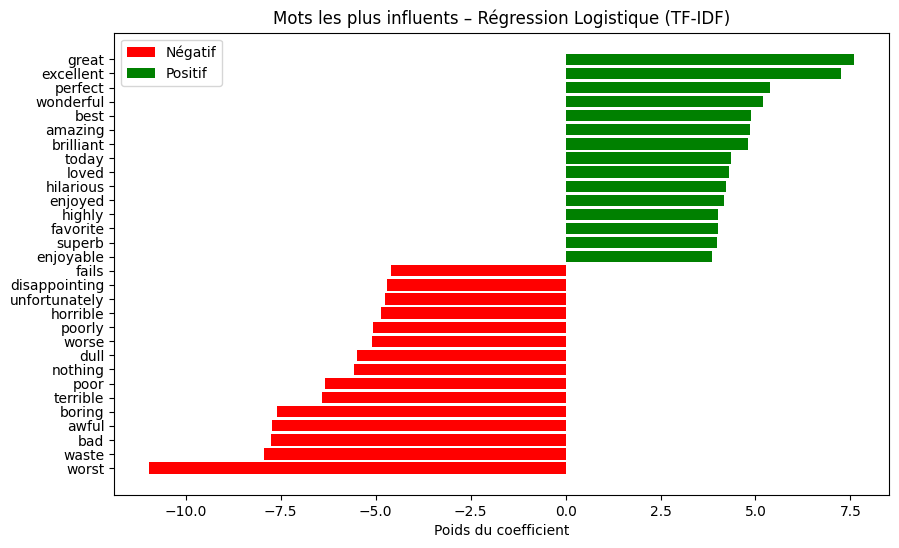

In [50]:
import numpy as np

feature_names = np.array(tfidf.get_feature_names_out())
coef = model_lr.coef_[0]

top_pos = np.argsort(coef)[-15:]
top_neg = np.argsort(coef)[:15]

plt.figure(figsize=(10,6))
plt.barh(feature_names[top_neg], coef[top_neg], color='red', label='Négatif')
plt.barh(feature_names[top_pos], coef[top_pos], color='green', label='Positif')
plt.title("Mots les plus influents – Régression Logistique (TF-IDF)")
plt.xlabel("Poids du coefficient")
plt.legend()
plt.show()


# 5)- Comparaison avec baseline






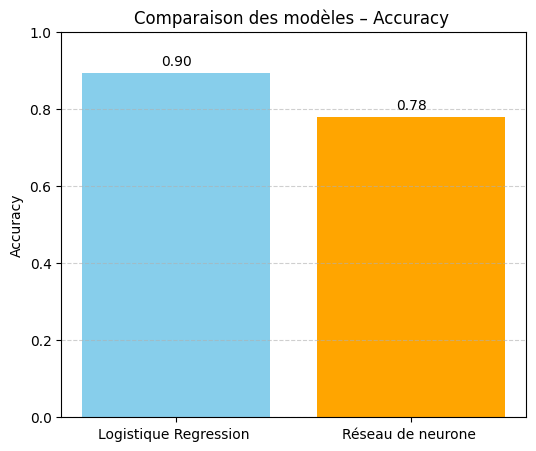

In [54]:
labels = ['Logistique Regression ', 'Réseau de neurone ']
accuracies = [0.8951, 0.7798]  # test/validation accuracies

plt.figure(figsize=(6,5))
plt.bar(labels, accuracies, color=['skyblue', 'orange'])
plt.ylim(0,1)
plt.title("Comparaison des modèles – Accuracy ")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')

plt.show()


**Réseau de neurones**

    Le modèle neuronal atteint une accuracy d'environ 93 % sur l'ensemble d'entraînement, ce qui montre qu'il apprend très bien à reconnaître les motifs présents dans les données.
    En revanche, son accuracy sur le jeu de validation chute à environ 78 %, ce qui révèle une baisse significative des performances sur des exemples jamais vus auparavant.

    ❎: Cette différence importante entre entraînement et validation indique un phénomène de surapprentissage (overfitting).
    Autrement dit, le modèle a trop mémorisé les données d'entraînement et n'arrive plus à bien généraliser à de nouveaux échantillons.

** Régression logistique (TF-IDF)**

    Le modèle de régression logistique basé sur TF-IDF atteint une accuracy d'environ 89,5 %, ce qui représente une excellente performance pour un modèle simple et rapide à entraîner.

    Les métriques de classification confirment cet équilibre :

    F1-score ≈ 0.90 pour les deux classes,

    Recall ≈ 0.91 pour les avis positifs,

    Precision ≈ 0.90 pour les avis négatifs.

    Ces résultats montrent que le modèle parvient à bien différencier les avis positifs et négatifs, sans biais notable vers une classe.

     ❎: Malgré sa simplicité, la régression logistique généralise mieux que le réseau de neurones, offrant un compromis très solide entre précision, vitesse d'exécution et stabilité.